The following picture shows the network of Florentine families in early 15th century

![Florentine families](https://datarepository.wolframcloud.com/resources/images/3ea/3ea30ebd-fcac-4105-b886-b6ddd63dcbd3-io-1-o.en.gif)

A node represents a family. An edge means there is a marriage relationship between the two families

- Import the network from the file `data/florentine.graphml`
- What is the shortest path between `Medici` and `Peruzzi`
- What is the average shortest path between `Medici` and all other nodes
- What is the average shortest path between each family and all other nodes
- What family has the lowest average shortest path?

In [1]:
import networkx as nx
%matplotlib inline

In [2]:
net = nx.read_graphml('data/florentine.graphml')

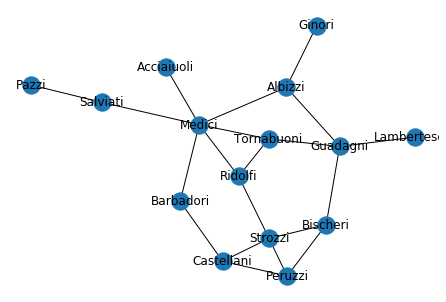

In [6]:
nx.draw(net, with_labels=True)

In [18]:
len(nx.shortest_path(net, 'Medici', 'Peruzzi')) - 1

3

In [12]:
def distance(node1, node2):
    return len(nx.shortest_path(net, node1, node2)) - 1

In [17]:
node1 = 'Medici'
distances = [distance(node1, node2) for node2 in net.nodes() if node1 != node2 ]
sum(distances) / len(distances)

1.7857142857142858

In [13]:
distance('Medici', 'Medici')

0

In [19]:
def ave_distance(node):
    distances = [distance(node, node2) for node2 in net.nodes() if node != node2 ]
    return sum(distances) / len(distances)
    

In [23]:
all_shortest_paths = {node:ave_distance(node) for node in net.nodes()}
all_shortest_paths

{'Acciaiuoli': 2.7142857142857144,
 'Medici': 1.7857142857142858,
 'Castellani': 2.5714285714285716,
 'Peruzzi': 2.7142857142857144,
 'Strozzi': 2.2857142857142856,
 'Barbadori': 2.2857142857142856,
 'Ridolfi': 2.0,
 'Tornabuoni': 2.0714285714285716,
 'Albizzi': 2.0714285714285716,
 'Salviati': 2.5714285714285716,
 'Pazzi': 3.5,
 'Bischeri': 2.5,
 'Guadagni': 2.142857142857143,
 'Ginori': 3.0,
 'Lamberteschi': 3.0714285714285716}

In [29]:
min(all_shortest_paths, key=lambda x: all_shortest_paths[x])

'Medici'

In [24]:
import pandas as pd


In [26]:
pd.Series(all_shortest_paths).idxmin()

'Medici'

In [ ]:
# shortest path can give all pair shortest paths

In [37]:
nx.shortest_path(net, 'Medici')

{'Medici': ['Medici'],
 'Acciaiuoli': ['Medici', 'Acciaiuoli'],
 'Barbadori': ['Medici', 'Barbadori'],
 'Ridolfi': ['Medici', 'Ridolfi'],
 'Tornabuoni': ['Medici', 'Tornabuoni'],
 'Albizzi': ['Medici', 'Albizzi'],
 'Salviati': ['Medici', 'Salviati'],
 'Castellani': ['Medici', 'Barbadori', 'Castellani'],
 'Strozzi': ['Medici', 'Ridolfi', 'Strozzi'],
 'Guadagni': ['Medici', 'Tornabuoni', 'Guadagni'],
 'Ginori': ['Medici', 'Albizzi', 'Ginori'],
 'Pazzi': ['Medici', 'Salviati', 'Pazzi'],
 'Peruzzi': ['Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
 'Bischeri': ['Medici', 'Ridolfi', 'Strozzi', 'Bischeri'],
 'Lamberteschi': ['Medici', 'Tornabuoni', 'Guadagni', 'Lamberteschi']}

In [33]:
nx.shortest_path(net)

{'Acciaiuoli': {'Acciaiuoli': ['Acciaiuoli'],
  'Medici': ['Acciaiuoli', 'Medici'],
  'Barbadori': ['Acciaiuoli', 'Medici', 'Barbadori'],
  'Ridolfi': ['Acciaiuoli', 'Medici', 'Ridolfi'],
  'Tornabuoni': ['Acciaiuoli', 'Medici', 'Tornabuoni'],
  'Albizzi': ['Acciaiuoli', 'Medici', 'Albizzi'],
  'Salviati': ['Acciaiuoli', 'Medici', 'Salviati'],
  'Castellani': ['Acciaiuoli', 'Medici', 'Barbadori', 'Castellani'],
  'Strozzi': ['Acciaiuoli', 'Medici', 'Ridolfi', 'Strozzi'],
  'Guadagni': ['Acciaiuoli', 'Medici', 'Tornabuoni', 'Guadagni'],
  'Ginori': ['Acciaiuoli', 'Medici', 'Albizzi', 'Ginori'],
  'Pazzi': ['Acciaiuoli', 'Medici', 'Salviati', 'Pazzi'],
  'Peruzzi': ['Acciaiuoli', 'Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
  'Bischeri': ['Acciaiuoli', 'Medici', 'Ridolfi', 'Strozzi', 'Bischeri'],
  'Lamberteschi': ['Acciaiuoli',
   'Medici',
   'Tornabuoni',
   'Guadagni',
   'Lamberteschi']},
 'Medici': {'Medici': ['Medici'],
  'Acciaiuoli': ['Medici', 'Acciaiuoli'],
  'Barbadori': 